# Data visualization and association mining

In [2]:
# load dependencies
library(data.table)
library(yaml)
library(universalmotif)
library(lattice)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



In [21]:
getwd()

[1] "/home/teamcovidtest/precisionFDA_Covid19_repo"

### Read metadata table to get the subject_id clinical features

In [8]:
metadata_table <- fread("metadata.csv")

In [9]:
names(metadata_table)

[1] "repository"                         "study_title"                       
  [3] "disease_diagnosis"                  "study_group_description"           
  [5] "sequences"                          "lab_name"                          
  [7] "tissue"                             "pcr_target_locus"                  
  [9] "cell_subset"                        "cell_phenotype"                    
 [11] "pub_ids"                            "study_id"                          
 [13] "subject_id"                         "sample_id"                         
 [15] "template_class"                     "sequencing_platform"               
 [17] "repertoire_id"                      "repertoire_name"                   
 [19] "repertoire_description"             "study_type"                        
 [21] "study_type_id"                      "study_description"                 
 [23] "inclusion_exclusion_criteria"       "grants"                            
 [25] "collected_by"                       "lab_address"                       
 [27] "submitted_by"                       "keywords_study"                    
 [29] "synthetic"                          "species"                           
 [31] "species_id"                         "organism"                          
 [33] "organism_id"                        "sex"                               
 [35] "age"                                "age_min"                           
 [37] "age_max"                            "age_unit"                          
 [39] "age_unit_id"                        "age_event"                         
 [41] "ancestry_population"                "ethnicity"                         
 [43] "race"                               "strain_name"                       
 [45] "linked_subjects"                    "link_type"                         
 [47] "disease_diagnosis_id"               "disease_length"                    
 [49] "disease_stage"                      "prior_therapies"                   
 [51] "immunogen"                          "intervention"                      
 [53] "medical_history"                    "sample_processing_id"              
 [55] "sample_type"                        "tissue_id"                         
 [57] "anatomic_site"                      "disease_state_sample"              
 [59] "collection_time_point_relative"     "collection_time_point_reference"   
 [61] "biomaterial_provider"               "tissue_processing"                 
 [63] "cell_subset_id"                     "cell_species"                      
 [65] "cell_species_id"                    "single_cell"                       
 [67] "cell_number"                        "cells_per_reaction"                
 [69] "cell_storage"                       "cell_quality"                      
 [71] "cell_isolation"                     "cell_processing_protocol"          
 [73] "template_quality"                   "template_amount"                   
 [75] "library_generation_method"          "library_generation_protocol"       
 [77] "library_generation_kit_version"     "forward_pcr_primer_target_location"
 [79] "reverse_pcr_primer_target_location" "complete_sequences"                
 [81] "physical_linkage"                   "sequencing_run_id"                 
 [83] "total_reads_passing_qc_filter"      "sequencing_facility"               
 [85] "sequencing_run_date"                "sequencing_kit"                    
 [87] "file_type"                          "filename"                          
 [89] "read_direction"                     "read_length"                       
 [91] "paired_filename"                    "paired_read_direction"             
 [93] "paired_read_length"                 "data_processing_id"                
 [95] "primary_annotation"                 "software_versions"                 
 [97] "paired_reads_assembly"              "quality_thresholds"                
 [99] "primer_match_cutoffs"               "collapsing_method"                 
[1

In [10]:
metadata_table_sub <- metadata_table[, c("sex", "age_min", "ancestry_population", "subject_id",
                  "disease_length", "disease_stage", "prior_therapies", "medical_history")]

Read the matrices and put them into a list

In [11]:
# naming matrices by generating a string vector dependent on the subject_id 
motif_matrix_name_list = {} # initializing a list of the motif names

motif_matrix_list = {} # initializing a list of the motifs

for(subject_ind in 1:nrow(metadata_table[1:200])){ # iterate through metadata rows for each subject_id instance 
                                                # only looking for the first 200 subjects in this eg
    motif_matrix_name_list[[subject_ind]] <- paste0( # programmatically naming the motif name  
        "PCM2_", subject_ind)
    motif_matrix_list[[subject_ind]] <- paste0( # programmatically naming the motif matrix
        "PCM2_motif2_", subject_ind)
    }

In [12]:
# Read the junction_aa motif sequence for each subject_id
#PCM_table2 <- read.table("output/PCM2", header = FALSE, row.names = 1)
#motif_con2 <- read_yaml('output/PCM_motif2')[8]
#names(PCM_table2) <- strsplit(motif_con2[[1]], split = "")[[1]]


PCM_table2 = {} # tabular form of the motif matrix
PCM_table2_col = {} # motif name
PCM_table2_col_mat = {} # motif matrix 

for(subject_ind in 1:nrow(metadata_table[1:200])){ # looping through subject_id indices
    # table 
    PCM_table2[[subject_ind]] <- read.table(
        paste0("output/", 
                     motif_matrix_name_list[[subject_ind]]), 
                         header = FALSE,
                         row.names = 1)
    # motif name
    PCM_table2_col[[subject_ind]] <- read_yaml(
        paste0("output/", 
               motif_matrix_list[[subject_ind]]))[8]
    
    names(PCM_table2[[subject_ind]]) <- strsplit( # splitting the motif into separate letters to matrix columns
        PCM_table2_col[[subject_ind]][[1]],
        split = "")[[1]]
    # make matrix 
    PCM_table2_col_mat[[subject_ind]] <- as.matrix(
                                            PCM_table2[[subject_ind]])
    names(PCM_table2_col_mat)[[subject_ind]] <- unique(metadata_table$subject_id)[subject_ind]
        }

# we want this as a list of matrices

### Now, we can take a look at the data.
Below is the motif CASSLGGGGNYEQYF for the subject_id ADIRP0000014

In [13]:
PCM_table2_col_mat[1]

,C,A,S,S,L,G,G,G,G,N,Y,E,Q,Y,F
A,0,145556,13275,1018,6564,13713,12140,12700,11885,11699,1205,292,17157,2,0
C,161587,2,81,84,127,24,15,11,42,59,19,1,5,5,0
D,0,1,8,401,9932,12268,8156,5583,5789,5079,17733,55,9,4,0
E,0,2,14,1753,12150,8945,3715,3997,4370,2178,17892,72786,44,2,0
F,6,0,22,203,6356,1962,1072,2185,2301,1941,358,20,3,57126,161713
G,0,14,267,2055,8315,36589,46863,58262,45749,23486,15631,18608,32,3,0
H,0,0,11,432,1747,1007,969,1133,1671,1888,1714,17,11,25457,0
I,0,9,2694,934,4062,2503,1447,2014,2609,2450,306,1573,6366,9,0
K,0,0,11,1363,2377,2704,1117,1101,1805,2184,544,7664,22,0,0
L,1,1,49,883,31951,10240,7285,5817,9634,3464,1064,81,28734,7,6


### Visualize the matrix as a heatmap for the first two subjects

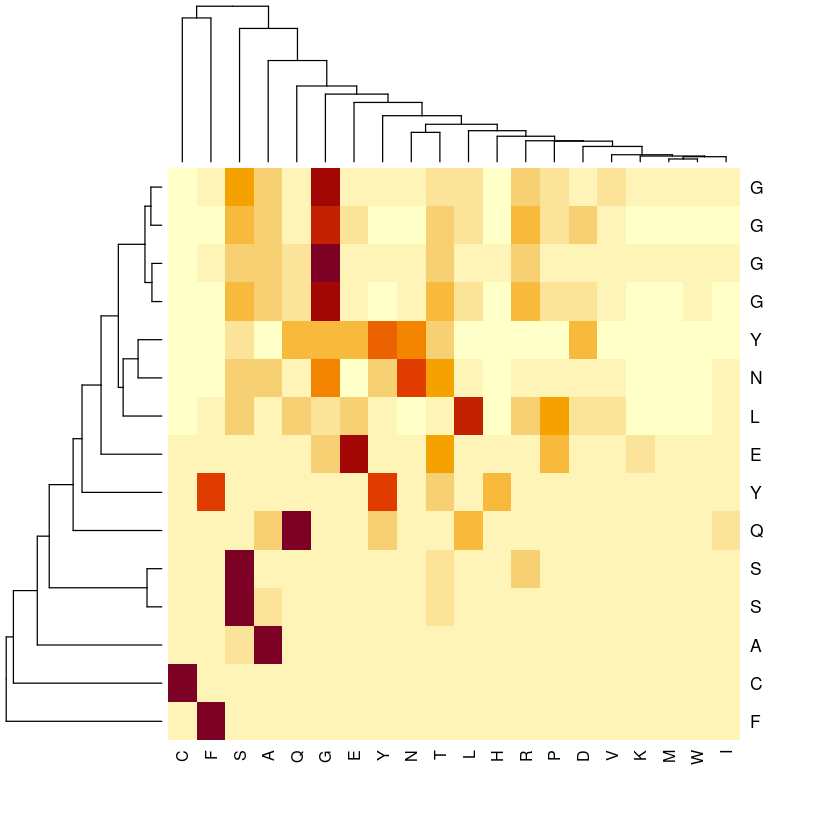

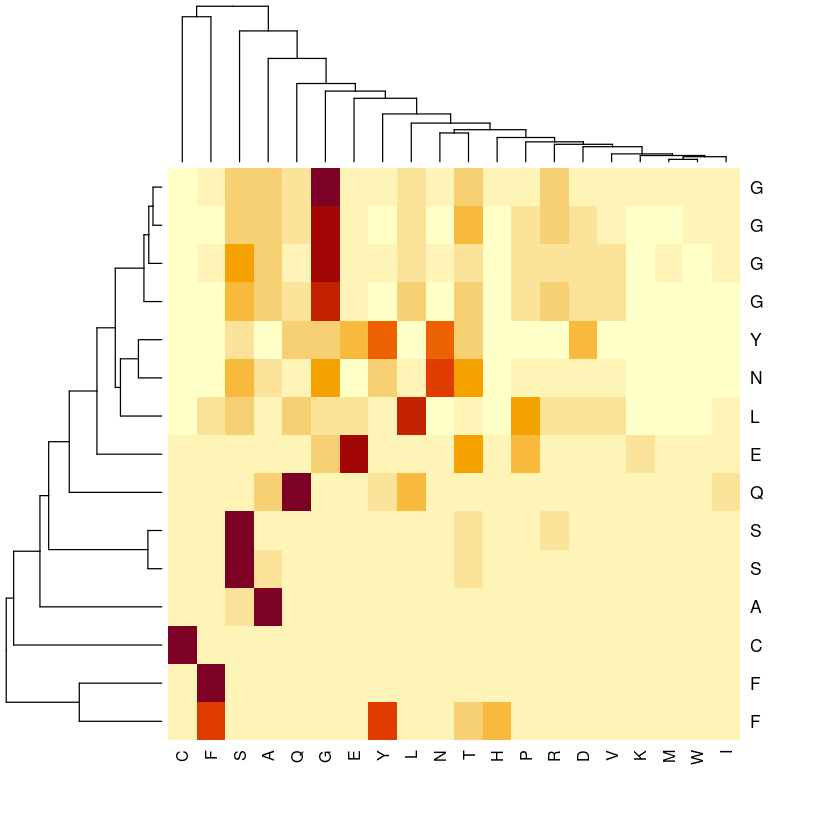

In [14]:
heatmap(t(PCM_table2_col_mat[[1]])) 
heatmap(t(PCM_table2_col_mat[[2]])) 

### Visualize motif sequence logo

In [15]:
# function to plot motif by subject_id
plot_motif <- function(pcm){
protein<-pcm2pfm( pcm )
protein_motif<-new("pfm", mat=protein, name="CAP", 
                   color=colorset(alphabet="AA",colorScheme="chemistry"))

plot(protein_motif)
}

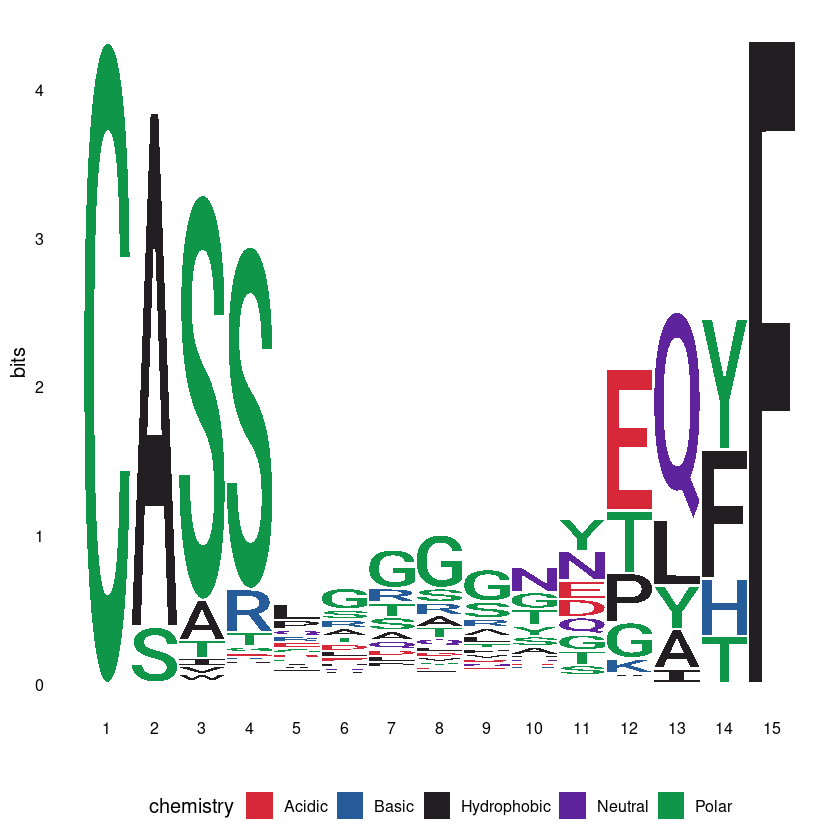

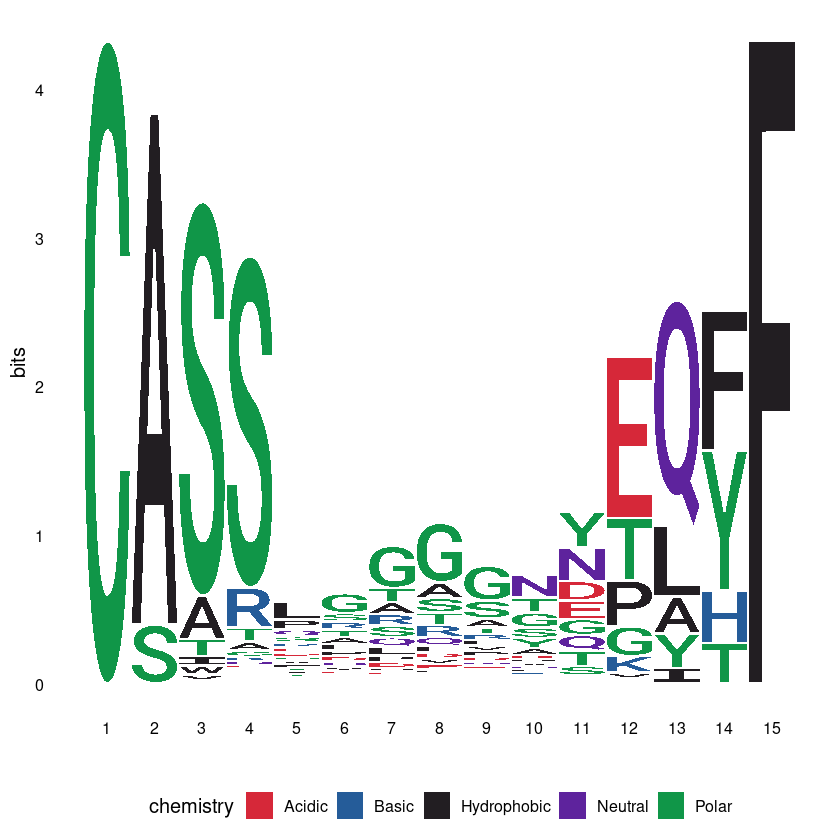

In [16]:
view_motifs(PCM_table2_col_mat[[1]]) 
view_motifs(PCM_table2_col_mat[[2]]) 

# Finding associations between clinical factors and adaptive immunity features

In [ ]:
# visualizing motif similarity between subjects as a tree

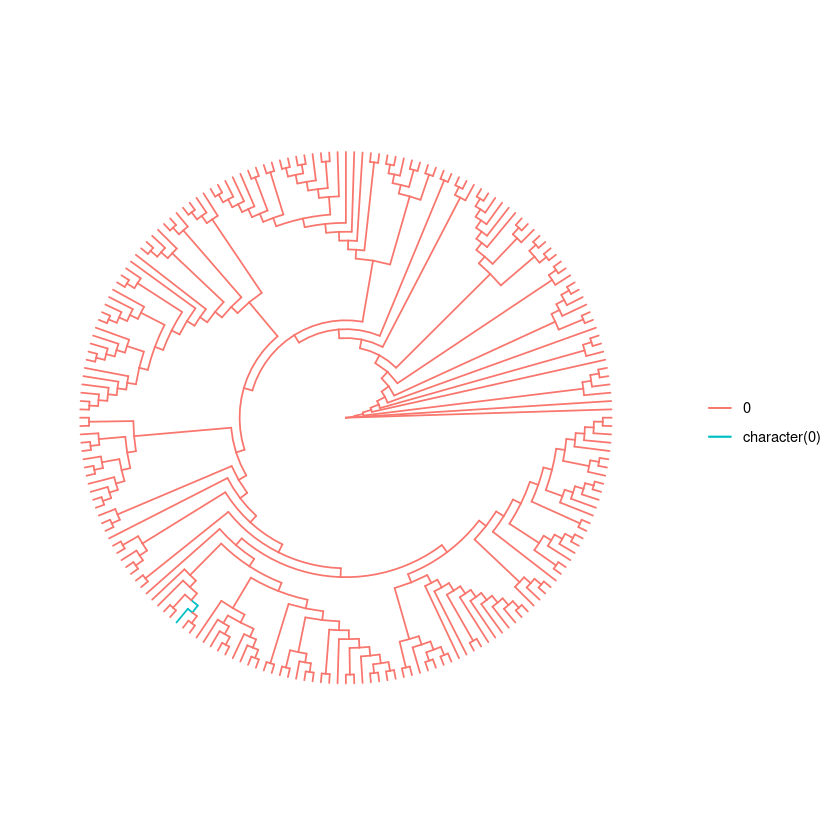

In [73]:
motif_tree(PCM_table2_col_mat)

In [22]:
motifs <- lapply(PCM_table2_col_mat, create_motif)

In [23]:
motif_df <- data.table(motif = motifs[[1]]

$ADIRP0000014

       Motif name:   motif
         Alphabet:   AA
             Type:   PPM
         Total IC:   31.52
        Consensus:   CASSLGGGGNYEQYF
     Target sites:   161720

  C   A    S    S    L    G    G    G    G    N    Y    E    Q    Y F
A 0 0.9 0.08 0.01 0.04 0.08 0.08 0.08 0.07 0.07 0.01 0.00 0.11 0.00 0
C 1 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0
D 0 0.0 0.00 0.00 0.06 0.08 0.05 0.03 0.04 0.03 0.11 0.00 0.00 0.00 0
E 0 0.0 0.00 0.01 0.08 0.06 0.02 0.02 0.03 0.01 0.11 0.45 0.00 0.00 0
F 0 0.0 0.00 0.00 0.04 0.01 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.35 1
G 0 0.0 0.00 0.01 0.05 0.23 0.29 0.36 0.28 0.15 0.10 0.12 0.00 0.00 0
H 0 0.0 0.00 0.00 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.00 0.00 0.16 0
I 0 0.0 0.02 0.01 0.03 0.02 0.01 0.01 0.02 0.02 0.00 0.01 0.04 0.00 0
K 0 0.0 0.00 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.00 0.05 0.00 0.00 0
L 0 0.0 0.00 0.01 0.20 0.06 0.05 0.04 0.06 0.02 0.01 0.00 0.18 0.00 0
M 0 0.0 0.00 0.00 0.00 0.01 0.00 0.00 0.02 0.0

In [68]:
``motifs[[2]][`]

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


In [72]:
motif_tree[]

parent,node,branch.length,label,group,isTip,x,y,branch,angle
<int>,<int>,<dbl>,<chr>,<fct>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
345,1,0.013392038,motif,character(0),TRUE,30,128,29.0,230.4
371,2,0.010003975,motif [duplicated #1],0,TRUE,30,129,29.5,232.2
380,3,0.010048483,motif [duplicated #2],0,TRUE,30,85,28.5,153.0
258,4,0.034963822,motif [duplicated #3],0,TRUE,30,50,26.0,90.0
386,5,0.009361512,motif [duplicated #4],0,TRUE,30,194,29.5,349.2
361,6,0.010509673,motif [duplicated #5],0,TRUE,30,66,29.5,118.8
328,7,0.018308091,motif [duplicated #6],0,TRUE,30,81,29.0,145.8
371,8,0.010003975,motif [duplicated #7],0,TRUE,30,130,29.5,234.0
290,9,0.022644189,motif [duplicated #8],0,TRUE,30,79,25.0,142.2


In [75]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [69]:
PCM_table2_col_mat[1]

,C,A,S,S,L,G,G,G,G,N,Y,E,Q,Y,F
A,0,145556,13275,1018,6564,13713,12140,12700,11885,11699,1205,292,17157,2,0
C,161587,2,81,84,127,24,15,11,42,59,19,1,5,5,0
D,0,1,8,401,9932,12268,8156,5583,5789,5079,17733,55,9,4,0
E,0,2,14,1753,12150,8945,3715,3997,4370,2178,17892,72786,44,2,0
F,6,0,22,203,6356,1962,1072,2185,2301,1941,358,20,3,57126,161713
G,0,14,267,2055,8315,36589,46863,58262,45749,23486,15631,18608,32,3,0
H,0,0,11,432,1747,1007,969,1133,1671,1888,1714,17,11,25457,0
I,0,9,2694,934,4062,2503,1447,2014,2609,2450,306,1573,6366,9,0
K,0,0,11,1363,2377,2704,1117,1101,1805,2184,544,7664,22,0,0
L,1,1,49,883,31951,10240,7285,5817,9634,3464,1064,81,28734,7,6


# Generating association rules

In [76]:
metadata_pr <- apriori(metadata_table_sub)

Warning message:
“Column(s) 1, 2, 4, 5, 6, 7, 8 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 28 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[369 item(s), 283 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [77]:
summary(metadata_pr)

set of 30 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
 4 19  7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     3.0     3.0     3.1     3.0     4.0 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.1025   Min.   :0.8000   Min.   :0.1060   Min.   :1.185  
 1st Qu.:0.1131   1st Qu.:0.9392   1st Qu.:0.1281   1st Qu.:1.263  
 Median :0.1360   Median :0.9733   Median :0.1413   Median :1.281  
 Mean   :0.1647   Mean   :0.9536   Mean   :0.1727   Mean   :1.479  
 3rd Qu.:0.1899   3rd Qu.:0.9976   3rd Qu.:0.2005   3rd Qu.:1.742  
 Max.   :0.3710   Max.   :1.0000   Max.   :0.3746   Max.   :2.083  
     count       
 Min.   : 29.00  
 1st Qu.: 32.00  
 Median : 38.50  
 Mean   : 46.60  
 3rd Qu.: 53.75  
 Max.   :105.00  

mining info:
               data ntransactions support confidence
 metadata_table_sub           283     0.1        0.8

In [78]:
library(arulesViz)

Loading required package: grid



# Visualizing association rules

Warning message in plot.rules(metadata_pr, method = "grouped", interactive = TRUE):
“The parameter interactive is deprecated. Use engine='interactive' instead.”


Interactive mode.


ERROR: Error in convertUnit(x, unitTo, "x", "location", "x", "location", valueOnly = valueOnly): 'x' argument must be a unit object


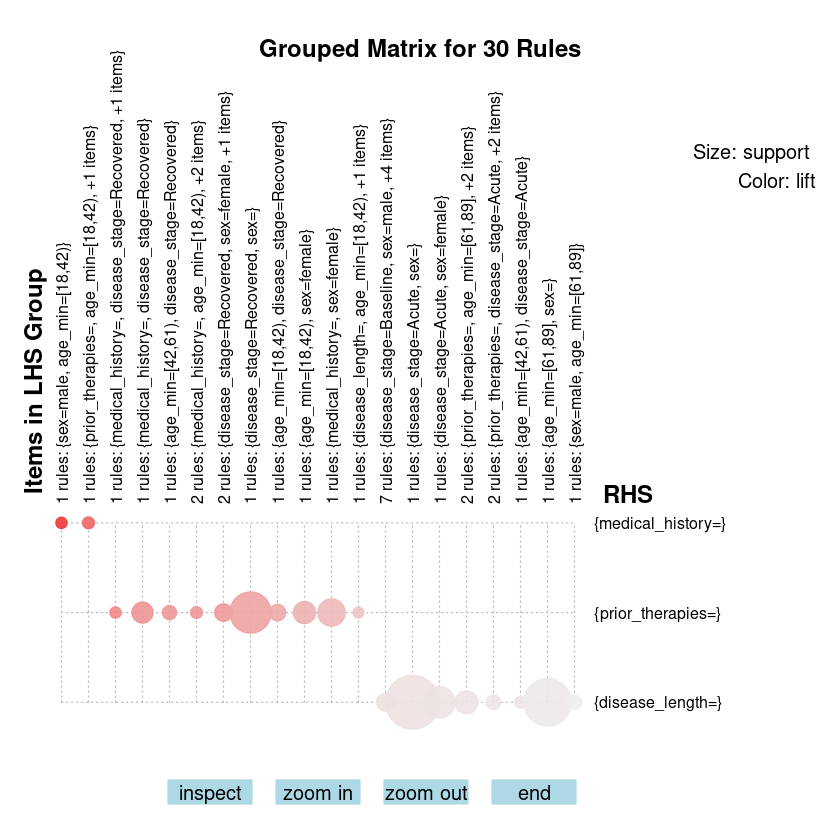

In [88]:
plot(metadata_pr, method = "grouped", interactive = TRUE)